In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
sns.set()

In [3]:
titanic_df = pd.read_csv("./train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Titanic data
##### PassengerId : Index of passenger
##### Survived : 0 = Dead, 1 = Survival
##### Pclass : 1 > 2 > 3 (Cabin Class)
##### sibsp : Brothers, sisters, spouses on board the ship together
##### parch : Parent, children on board the ship together
##### embarked : Intermediate settlement port

In [3]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Age는 평균으로, Cabin, Embarked는 N으로 Null값 채움
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df["Embarked"].fillna("N", inplace=True)
print("데이터 세트 Null 값 개수", titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [5]:
print(" Sex 값 분포 :\n", titanic_df["Sex"].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df["Cabin"].value_counts())
print("\n Embarked 값 분포 :\n", titanic_df["Embarked"].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
E12              1
A32              1
C86              1
A20              1
C85              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [7]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

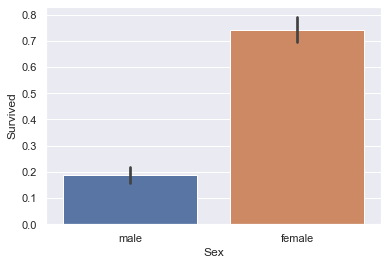

In [8]:
sns.barplot(x="Sex", y="Survived", data=(titanic_df))
# 여성이 비교적 많이 생존

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

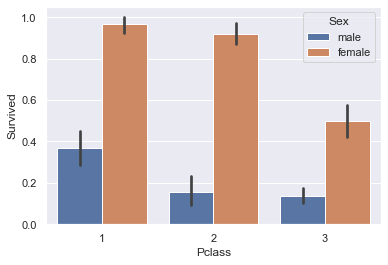

In [9]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)
# 1등석 사람들이 비교적 많이 생존
# 여성의 경우 1, 2등석간 크게 차이가 없으나 3등석은 생존율이 많이 떨어짐
# 남성의 경우 1등석과 2, 3등석간 차이가 큼

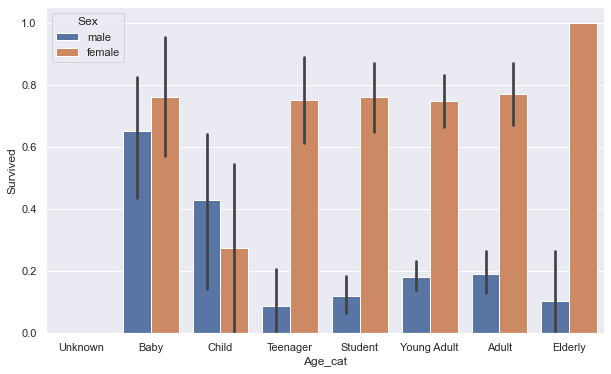

In [10]:
# age에 따른 구분
def get_category(age):
    cat = ""
    if age <= -1:
        cat = "Unknown"
    elif age <= 5:
        cat = "Baby"
    elif age <= 12:
        cat = "Child"
    elif age <= 18:
        cat = "Teenager"
    elif age <= 25:
        cat = "Student"
    elif age <= 35:
        cat = "Young Adult"
    elif age <= 60:
        cat = "Adult"
    else:
        cat = "Elderly"

    return cat


plt.figure(figsize=(10, 6))

# X값
group_names = [
    "Unknown",
    "Baby",
    "Child",
    "Teenager",
    "Student",
    "Young Adult",
    "Adult",
    "Elderly",
]

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x: get_category(x))
sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=titanic_df, order=group_names)
titanic_df.drop("Age_cat", axis=1, inplace=True)

In [11]:
# 데이터 전처리 관련 함수
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df


def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df


def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [12]:
titanic_df = pd.read_csv("./train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [13]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=1
)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도: {:.4f}".format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도: {:.4f}".format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7318
RandomForestClassifier 정확도: 0.7542
LogisticRegression 정확도: 0.7989


c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
from sklearn.model_selection import KFold


def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = (
            X_titanic_df.values[train_index],
            X_titanic_df.values[test_index],
        )
        y_train, y_test = (
            y_titanic_df.values[train_index],
            y_titanic_df.values[test_index],
        )
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [17]:
exec_kfold(dt_clf)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [18]:
exec_kfold(rf_clf)

교차 검증 0 정확도: 0.7989
교차 검증 1 정확도: 0.7640
교차 검증 2 정확도: 0.8202
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.8315
평균 정확도: 0.8013


In [19]:
exec_kfold(lr_clf)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7921
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7472
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7901


c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\si

In [20]:
from sklearn.model_selection import cross_val_score


def exec_cvs(clf, folds=5):
    scores = cross_val_score(clf, X_titanic_df, y_titanic_df, cv=5)
    for iter_count, accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    print("평균 정확도: {0:.4f}".format(np.mean(scores)))

In [21]:
exec_cvs(dt_clf)

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [22]:
exec_cvs(rf_clf)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7654
교차 검증 2 정확도: 0.8258
교차 검증 3 정확도: 0.7921
교차 검증 4 정확도: 0.8588
평균 정확도: 0.8071


In [23]:
exec_cvs(lr_clf)

c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


교차 검증 0 정확도: 0.7877
교차 검증 1 정확도: 0.7933
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8192
평균 정확도: 0.7879


c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\wjsrj\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth": [2, 3, 5, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 5, 8],
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8343
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8045


In [25]:
parameters = {
    "max_depth": [2, 3, 5, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 5, 8],
}

grid_rclf = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_rclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 :", grid_rclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}".format(grid_rclf.best_score_))
best_rclf = grid_rclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 RandomForestClassifier 정확도: {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.8427
테스트 세트에서의 RandomForestClassifier 정확도: 0.8045


In [26]:
from sklearn.base import BaseEstimator


class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X["Sex"].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv("./train.csv")
X_titanic_df = titanic_df.drop("Survived", axis=1)
y_titanic_df = titanic_df["Survived"]
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=0
)

In [33]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print("Dummy Classifier의 정확도 : {0:.4f}".format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도 : 0.7877
